# Using Python for extracting most common words from a text
### Simple Python script without the use of heavy text processing libraries to extract most common words from a corpus.
https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0


##### Interview in the newspaper:
https://www.publico.pt/2017/10/07/tecnologia/entrevista/o-grande-risco-da-inteligencia-artificial-sao-maquinas-demasiado-estupidas-1787954

Developed at 7-10-2018 by MRobalinho

In [1]:
# Some Documentation:
# https://www.kdnuggets.com/2016/06/r-python-top-analytics-data-mining-data-science-software.html
# https://medium.com/@MarutiTech/which-are-the-popular-languages-for-data-science-8e67fb5ef1ff
# https://www.kdnuggets.com/2017/01/most-popular-language-machine-learning-data-science.html

In [2]:
# http://www.storybench.org/getting-started-with-python-and-jupyter-notebooks-for-data-analysis/

In [3]:
# Libraries
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Path to acess the file
path = 'ml/count_words/'

In [5]:
# Read input file, note the encoding is specified here 
# It may be different in your text file
my_text = 'Entrevista_Pedro_Domingos.txt'

file = open(path + my_text, encoding="utf8")
text_file = file.read()

In [6]:
# My text
#text_file

In [7]:
from pprint import pprint

In [8]:
# print my text file to analyze
pprint(text_file, width=100)

('“O grande risco da inteligência artificial são máquinas demasiado estúpidas” \n'
 '\n'
 '“O grande risco da inteligência\n'
 'artificial são máquinas\n'
 'demasiado estúpidas”\n'
 'O académico Pedro Domingos, autor de A Revolução do\n'
 'Algoritmo Mestre, antevê um mundo em que os computadores\n'
 'poderão ser capazes de aprender tudo.\n'
 'Os computadores já são capazes de\n'
 'aprender: analisam enormes quantidades\n'
 'de dados e aprendem o que cada um de nós\n'
 'quer comprar, o tipo de pessoa por quem\n'
 'nos sentimos atraídos, quais os empregos\n'
 'que podem ser um bom passo na carreira,\n'
 'quais de nós podem vir a ser terroristas.\n'
 'O livro A Revolução do Algoritmo Mestre\n'
 '(editora Manuscrito), do académico e\n'
 'investigador Pedro Domingos, descreve\n'
 'como estes algoritmos são usados por\n'
 'empresas como a Amazon, o Google e o\n'
 'Facebook, e quais os impactos que já estão\n'
 'a ter no mundo. E avança para a busca de\n'
 'um algoritmo-mestre, um sistema de\

 'Como é que um especialista vê o\n'
 'circo mediático em torno dos riscos\n'
 'da inteligência artificial?\n'
 '\n'
 'Há riscos verdadeiros e riscos imaginários.\n'
 'O circo maior é em torno dos riscos\n'
 'imaginários e distrai as pessoas dos\n'
 'verdadeiros. Um dos imaginários é esta\n'
 'ideia de que as máquinas se revoltam e\n'
 'tentam controlar o mundo. Outro risco\n'
 'muito maior é o risco das máquinas\n'
 'incompetentes: máquinas que tomam\n'
 'decisões erradas por não perceberem\n'
 'melhor. Ironicamente, o grande risco da\n'
 'inteligência artificial não são máquinas\n'
 'demasiado inteligentes, são máquinas\n'
 'demasiado estúpidas. As máquinas já\n'
 'tomam uma série de decisões muito\n'
 'importantes: que candidatos a empregos\n'
 'são entrevistados por empresas, quem são\n'
 'os potenciais criminosos ou terroristas,\n'
 'quem se recomenda a outra pessoa para\n'
 'que saiam juntos.\n'
 'Descreve no livro um cenário em que\n'
 'há um modelo virtual das pessoas,\n'
 'que

In [9]:
# Stopwords - File with words we don't need count
# read one word each line of stopwords 
stopwords = set(line.strip() for line in open(path + 'stopwords_pt.txt'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

In [10]:
# Print the words i dont't want to count
print (stopwords) 

{'das', 'algm', 'faz', 'isso', 'o', 'por', 'no', 'seja', '3', 'lhe', 'pedro', 'estes', 'vez', '8', 'ele', 'aqueles', '9', 'quais', 'na', 'seria', 'as', 'para', 'grande', 'alguns', '4', 'em', 'algo', 'fazem', 'said', 'quem', 'uma', 'nosso', 'que', 'vão', 'há', 'mr', 'algumas', 'aí', 'cada', 'pela', '5', 'eles', 'one', 'um', 'da', 'muitas', 'alguem', 'noutro', 'mesmo', 'ao', 'como', '1', 'tudo', 'numa', 'se', 'este', 'nas', 'esses', 'ela', 'num', 'estas', 'mas', 'alguma', 'está', 'ter', 'mais', 'ser', 'forma', 'mrs', 'aos', 'podem', '2', 'elas', 'nós', 'outras', 'outro', 'me', 'outra', 'two', 'mim', 'meu', 'muito', 'nos', 'qual', 'mesma', 'com', 'não', 'é', '6', '0', 'esta', 'ainda', 'serem', 'ou', 'apesar', '7', 'já', 'pode', 'de', 'coisas', 'essas', 'pelos', 'dez', 'os', 'essa', 'do', 'outros', 'a', 'quando', 'apenas', 'dos', 'nem', 'aquilo', 'esse', 'são', 'e', 'pelo', 'bem'}


# Count Text Words

In [11]:
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}

In [12]:
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in text_file.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1


In [13]:
pprint(wordcount)

{'(editora': 1,
 '(personalizadas)': 1,
 '[resulta': 1,
 'abertos': 1,
 'abra': 1,
 'académico': 2,
 'acesso': 2,
 'acha': 2,
 'acontecer': 1,
 'actual': 1,
 'acções': 1,
 'ajudar': 1,
 'algoritmo': 10,
 'algoritmo-mestre': 9,
 'algoritmomestre': 1,
 'algoritmos': 15,
 'algoritmos-mestres': 1,
 'alguém': 1,
 'alternativa': 1,
 'além': 1,
 'amazon': 6,
 'amigo': 1,
 'analisam': 1,
 'anos': 2,
 'antes': 1,
 'antevê': 1,
 'anti-semitas': 1,
 'aparece': 1,
 'aparecem': 1,
 'aprende': 2,
 'aprendem': 2,
 'aprender': 6,
 'aprenderem': 1,
 'aprendido': 1,
 'aprendizagem': 12,
 'aprendizagem]': 1,
 'apresenta': 1,
 'arma': 1,
 'artificial': 8,
 'artificial?': 1,
 'aspecto': 1,
 'aspectos': 1,
 'atingir': 2,
 'atingirmos': 2,
 'atirar-se': 1,
 'atraídos': 1,
 'atropelam': 1,
 'até': 1,
 'automatizar': 2,
 'automática': 3,
 'autor': 2,
 'autónoma?': 1,
 'autónomo': 1,
 'avança': 1,
 'balança': 3,
 'banco': 3,
 'baseados': 1,
 'bastante': 1,
 'bill': 1,
 'bom': 1,
 'busca': 1,
 'caem': 1,
 'caixa

In [14]:
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

How many most common words to print: 50

OK. The 50 most common words are as follows

pessoas :  21
algoritmos :  15
aprendizagem :  12
inteligência :  11
algoritmo :  10
dados :  10
fazer :  10
carro :  10
máquinas :  9
algoritmo-mestre :  9
artificial :  8
demasiado :  8
mundo :  8
importante :  8
empresas :  7
hoje :  7
computadores :  6
aprender :  6
amazon :  6
google :  6
facebook :  6
riscos :  6
sabemos :  6
modelo :  6
risco :  5
livro :  5
objectivo :  5
prazo :  5
poder :  5
tecnologia :  5
domingos :  4
capazes :  4
pessoa :  4
– :  4
estamos :  4
longo :  4
precisamos :  4
possível :  4
seres :  4
humanos :  4
programadores :  4
decisões :  4
diferentes :  4
descreve :  3
capaz :  3
conhecimento :  3
inteligentes :  3
dois :  3
utilizador :  3
ensinar :  3


In [15]:
# Close the file
file.close()

# Using Bar Graph

In [16]:
my_title = "Most common Words from text: "+my_text

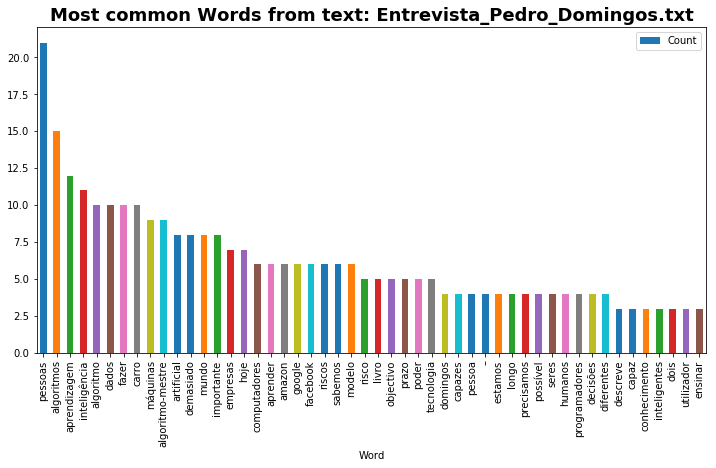

In [17]:
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])

fig, ax1 = plt.subplots(figsize=(12,6))
ax1 = df.plot.bar(ax=ax1, x='Word',y='Count')
plt.title(my_title , fontdict={'size':18, 'weight': 'bold'});

In [18]:
df.head(10)

,Word,Count
0,pessoas,21
1,algoritmos,15
2,aprendizagem,12
3,inteligência,11
4,algoritmo,10
5,dados,10
6,fazer,10
7,carro,10
8,máquinas,9
9,algoritmo-mestre,9


# Using Word Cloud Graph

In [19]:
# To install the wordcloud use the bellow commands
# conda install -c conda-forge wordcloud
# https://www.datacamp.com/community/tutorials/wordcloud-python
# https://www.commonlounge.com/discussion/317a12109a634fc1aa44150ea806bbf3
# https://matplotlib.org/examples/color/colormaps_reference.html - Colormap to matplotlib

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import cm
import numpy as np

In [20]:
wrds = df.Word

# WORDS without spaces
wrds =  df["Word"].str.replace(" ","")
wrds.head()

0         pessoas
1      algoritmos
2    aprendizagem
3    inteligência
4       algoritmo
Name: Word, dtype: object

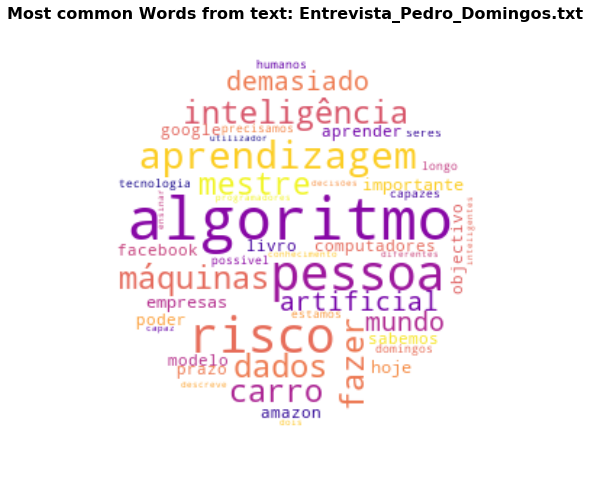

In [34]:
# Plot The WORDS in a Circle

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white",  mask=mask, colormap=cm.plasma).generate(" ".join(wrds))

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation="bilinear", origin='upper')
plt.axis("off")
#plt.tight_layout(pad=0)
plt.title(my_title , fontdict={'size':16, 'weight': 'bold'});

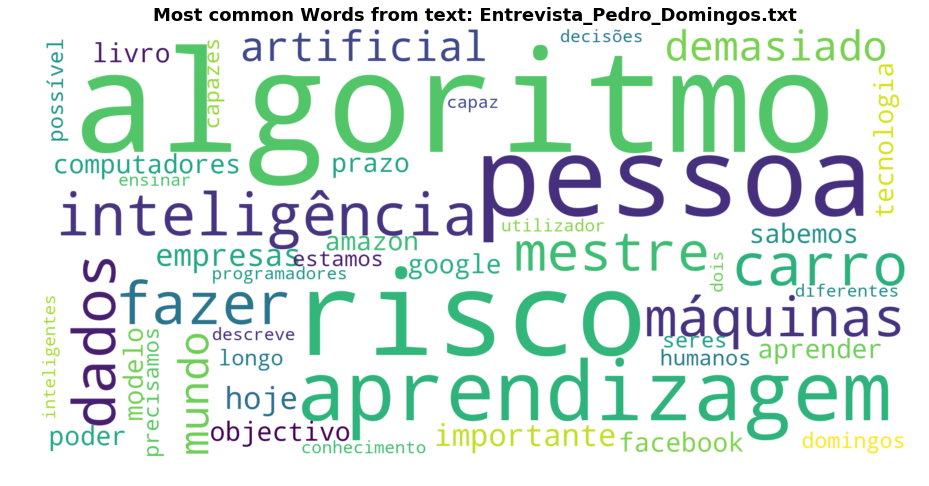

In [22]:
# Plot The WORDS in a Frame

wc = WordCloud( background_color='white', colormap=cm.viridis, scale=5).generate(" ".join(wrds))

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation="bilinear", origin='upper')
plt.axis("off")
plt.title(my_title , fontdict={'size':18, 'weight': 'bold'});

# Using Pie Graph

In [23]:
from pandas.tools.plotting import table

In [26]:
# Obtain first 20 words
df1 = df.head(20)
df1.head()

,Word,Count
0,pessoas,21
1,algoritmos,15
2,aprendizagem,12
3,inteligência,11
4,algoritmo,10


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  from ipykernel import kernelapp as app


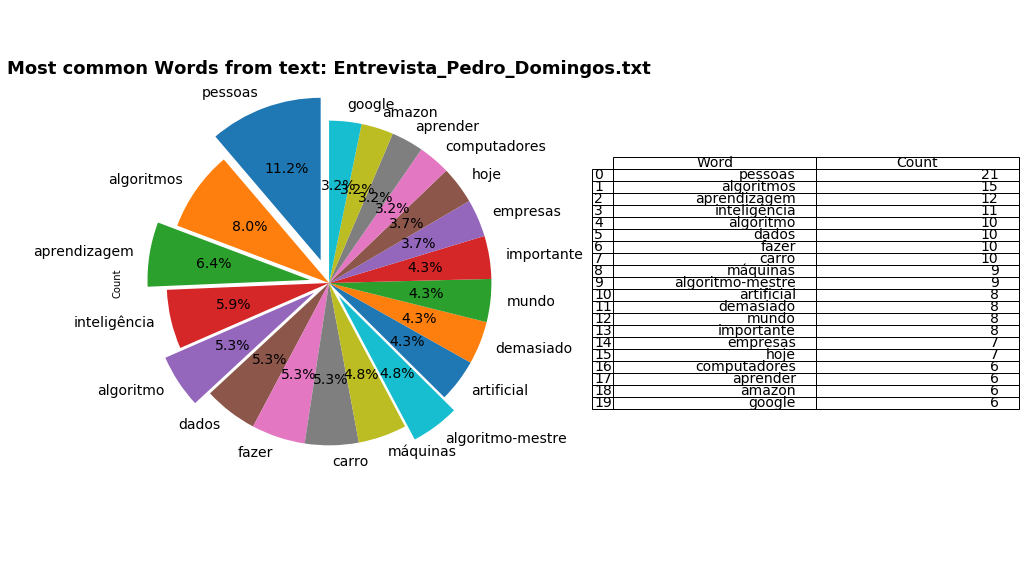

In [31]:
# First Graph - Plot Pie Graph
plt.figure(figsize=(16,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df1.plot(kind='pie', y = 'Count', ax=ax1, autopct='%1.1f%%', 
         startangle=90, shadow=False, 
         labels=df['Word'],   # Labels
         explode=(0.15, 0, 0.12, 0, 0.11,0,0,0,0,0.10,0,0,0,0,0,0,0,0,0,0), # draw a portion
         legend = False, fontsize=14)

plt.title(my_title , fontdict={'size':18, 'weight': 'bold'});

# Second Graph - plot table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, df1, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()